# 타이타닉 데이터를 활용한 데이터 분석

# 1. 라이브러리 및 데이터
# Library & Data

In [259]:
import pandas as pd #판다스 패키지 불러오기
import numpy as np
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델 불러오기
from sklearn.tree import DecisionTreeClassifier # 의사결정 나무 모델 불러오기

In [260]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()

In [261]:
 # 데이터 불러오기
train = pd.read_csv('G:\내 드라이브\Github\Dacon-practice\타이타닉 생존자 예측/train.csv') # 모델 학습 파일
test = pd.read_csv('G:\내 드라이브\Github\Dacon-practice\타이타닉 생존자 예측/test.csv') # 모델 시험지 파일
sub = pd.read_csv('G:\내 드라이브\Github\Dacon-practice\타이타닉 생존자 예측/sample_submission.csv') #답안지 파일

# 2. 탐색적 자료분석
# Exploratory Data Analysis (EDA)

In [262]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerId : 탑승객의 고유 아이디
- Survival : 생존여부(0: 사망, 1: 생존)
- Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓번호
- Fare: 티켓의 요금
- Cabin: 객실번호
- Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

In [263]:
train.shape

(891, 12)

In [264]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [265]:
drops = ['Name', 'Ticket', 'Cabin']
train.drop(drops, axis=1)
test.drop(drops, axis=1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [266]:
# train['Pclass'] = train['Pclass'].astype('object')
train['PassengerId'] = train['PassengerId'].astype('object')

pd.Series_value_counts() # Series에서만 정상적으로 작동!

- series 내 고유값들 각각의 개수를 보여주는 함수
- 가장 많이 나오는 고유값들 순서로 보여줍니다.
- 비어있는 값은 고려하지 않습니다.

In [267]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [268]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [269]:
train.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [270]:
train.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [271]:
train.groupby('Embarked').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


pd.Series.plot(kind = "bar")
- 막대 그래프
- index 값이 x축, value값이 y축으로 대응 됩니다.
- value_counts()의 결과물을 보여줄 때 유용합니다.
- groupby된 결과물을 보여줄 때 유용합니다.

<AxesSubplot:xlabel='Pclass'>

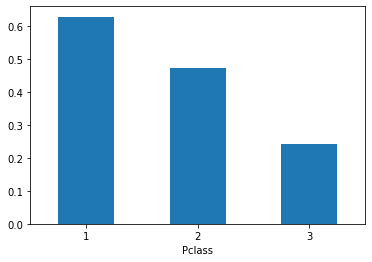

In [272]:
train.groupby('Pclass').mean()['Survived'].plot(kind='bar', rot = 0) # 각도 0

pd.Series.plot(kind = 'hist')
- 히스토그램: 구간별로 속해있는 row의 개수를 시각화 합니다.
- 수치형에서만 가능, 범주는 안됩니다!

<AxesSubplot:ylabel='Frequency'>

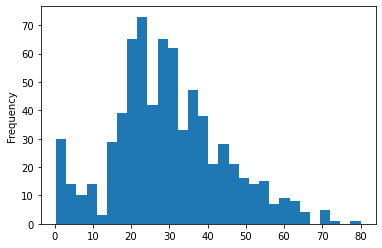

In [273]:
train['Age'].plot(kind='hist', bins = 30) # bins 촘촘한 정도

보조선 => grid = True

<AxesSubplot:ylabel='Frequency'>

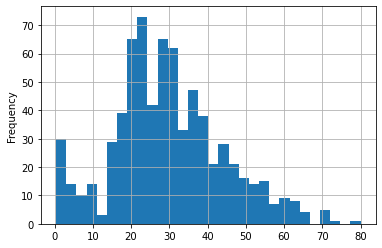

In [274]:
train['Age'].plot(kind='hist', bins = 30, grid=True) # bins 촘촘한 정도

pd.DataFrame.plot(x, y, kind = 'scatter')
- 산점도: 두 변수간의 관계를 시각화

<AxesSubplot:xlabel='Age', ylabel='Fare'>

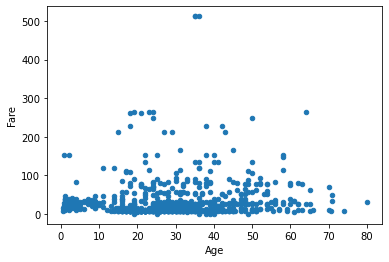

In [275]:
train.plot(x = 'Age', y = 'Fare', kind = 'scatter')

# 3. 데이터 전처리
# Data Cleansing & Pre-Processing

pd.Series.isna()
- 결측치 여부를 확인해준다.
- 결측치면 True 아니면 False


In [276]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

pd.DataFrame.fillna()
- 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시.
- 범주형 변수일 경우 최빈값으로 대체 가능.

In [277]:
train['Age'].median()

28.0

In [278]:
train['Age'] = train['Age'].fillna(28)

In [279]:
train['Embarked'].value_counts() # 문자열

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [280]:
train['Embarked'] = train['Embarked'].fillna('S')

In [281]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

pd.Series.map()
- 시리즈 내 값을 변환할 때 사용하는 함수
- 문자열의 경우 숫자형으로 대체해주어야함. 모델에 넣기위해서

In [282]:
train['Sex'] = train['Sex'].map({'male' : 0, 'female' : 1})

In [283]:
train.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Sex         0.543351
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

# 4. 변수 선택 및 모델 구축
# Feature Engineering & Initial Modeling

In [284]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [320]:
X_train = train[['Sex', 'Pclass']]
y_train = train['Survived']

In [321]:
test['Sex'] = test['Sex'].map({'male' : 0, 'female' : 1})

In [323]:
X_test = test[['Sex', 'Pclass']]

sklearn.linear_model.LogisticRegression()
- 로지스틱 회귀 모형
- 0과 1사이의 값을 산출

In [324]:
lr = LogisticRegression()

sklearn.tree.DecisionTreeClassifier()
- 의사결정 나무 모델

In [325]:
dt = DecisionTreeClassifier()

# 5. 모델 학습 및 검증
# Model Tuning & Evaluation

model.fit()

- 모델 학습

In [326]:
X_train

,Sex,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,1,3
889,0,1


In [327]:
train.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Sex         0.543351
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

In [328]:
# lr.fit(X_train, y_train)

In [329]:
# dt.fit(X_train, y_train)

In [330]:
categorical_features_indices1 = np.where(X_train.dtypes == np.object)[0]

In [331]:
categorical_features_indices1

array([], dtype=int64)

In [332]:
cat.fit(X_train, y_train)#, cat_features = categorical_features_indices1)

Learning rate set to 0.009807
0:	learn: 0.6879707	total: 1.07ms	remaining: 1.06s
1:	learn: 0.6829166	total: 2.51ms	remaining: 1.25s
2:	learn: 0.6773280	total: 4.38ms	remaining: 1.46s
3:	learn: 0.6718753	total: 5.88ms	remaining: 1.46s
4:	learn: 0.6665513	total: 7.19ms	remaining: 1.43s
5:	learn: 0.6613554	total: 8.3ms	remaining: 1.38s
6:	learn: 0.6565390	total: 9.6ms	remaining: 1.36s
7:	learn: 0.6515838	total: 11.2ms	remaining: 1.39s
8:	learn: 0.6469954	total: 13.3ms	remaining: 1.46s
9:	learn: 0.6439947	total: 14.3ms	remaining: 1.42s
10:	learn: 0.6393426	total: 15.7ms	remaining: 1.41s
11:	learn: 0.6350385	total: 16.9ms	remaining: 1.39s
12:	learn: 0.6308369	total: 18ms	remaining: 1.37s
13:	learn: 0.6264997	total: 19.4ms	remaining: 1.37s
14:	learn: 0.6238380	total: 21.4ms	remaining: 1.4s
15:	learn: 0.6212327	total: 22.5ms	remaining: 1.38s
16:	learn: 0.6173517	total: 24.1ms	remaining: 1.4s
17:	learn: 0.6133365	total: 25.4ms	remaining: 1.39s
18:	learn: 0.6094271	total: 26.7ms	remaining: 1.38

model.predict()

- 모델 예측

In [333]:
# lr.predict(X_test)

In [334]:
cat.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

model.predict_proba()

In [335]:
# lr_pred = lr.predict_proba(X_test)[:,1]

In [336]:
# dt_pred = dt.predict_proba(X_test)[:,1]

In [337]:
cat_pred = cat.predict_proba(X_test)[:,1]

- 모델 예측

pd.DataFrame.to_csv()

- csv파일 저장하는 함수

In [338]:
# sub['Survived'] = lr_pred
# sub.to_csv('logistic_regression_pred.csv', index = False)

In [339]:
# sub['Survived'] = dt_pred
# sub.to_csv('decision_tree_pred.csv', index = False)

In [340]:
sub['Survived'] = cat_pred
sub.to_csv('Cat_pred.csv', index = False)

In [341]:
cat_pred

array([0.13522814, 0.13522814, 0.15978395, 0.13522814, 0.13522814,
       0.13522814, 0.13522814, 0.15978395, 0.13522814, 0.13522814,
       0.13522814, 0.36789089, 0.36789089, 0.15978395, 0.36789089,
       0.15978395, 0.15978395, 0.13522814, 0.13522814, 0.13522814,
       0.36789089, 0.13522814, 0.36789089, 0.36789089, 0.36789089,
       0.13522814, 0.36789089, 0.13522814, 0.36789089, 0.13522814,
       0.15978395, 0.15978395, 0.13522814, 0.13522814, 0.36789089,
       0.13522814, 0.13522814, 0.13522814, 0.13522814, 0.13522814,
       0.13522814, 0.36789089, 0.13522814, 0.15978395, 0.36789089,
       0.13522814, 0.36789089, 0.13522814, 0.36789089, 0.13522814,
       0.36789089, 0.15978395, 0.15978395, 0.36789089, 0.15978395,
       0.13522814, 0.13522814, 0.13522814, 0.13522814, 0.36789089,
       0.13522814, 0.15978395, 0.13522814, 0.13522814, 0.36789089,
       0.15978395, 0.13522814, 0.36789089, 0.36789089, 0.36789089,
       0.13522814, 0.13522814, 0.13522814, 0.36789089, 0.36789